In [1]:
import pickle

from zipreg_model import *
from inference import *
from criticism import *

In [4]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)

p = ZIPoissReg(features, data)


svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                model = p.model,
                                  guide = p.guide,
                                  filename='models/svi_zip_params_station_plus_hr.pkl')



{'demand': tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 'data': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.]])}

In [13]:
features

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_23', 'station_24',
         'station_25', 'station_26', 'station_27', 'station_28',
         'station_29', 'station_30', 'station_31', 'station_32',
         'station_33', 'station_34', 'station_35', 'station_36',
         'station_37', 'station_38', 'station_39', 'station_41',
         'station_42', 'station_45', 'station_46', 'station_47',
         'station_48', 'station_49', 'station_50', 'station_51',
         'station_54', 'station_55', 'station_56', 'station_57',
         'station_58', 'station_59', 'station_60', 'station_61',
         'station_62', 'station_63', 'station_64', 'station_65',
         'station_66', 'station_67', 'station_68', 'station_69',
         'station_70', 'station_71', 'station_72',

In [5]:
post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=1000)

In [16]:
svi_posterior

In [14]:
sites = ["station_39","hour_0","hour_9" ]

svi_samples = {site: EmpiricalMarginal(svi_posterior, sites=site)
                     .enumerate_support().detach().cpu().numpy()
               for site in sites}

for site, values in summary(svi_samples).items():
    print("Site: {}".format(site))
    print(values, "\n")

TypeError: 'dict' object is not callable

In [9]:
post_samples[0:10,1,0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

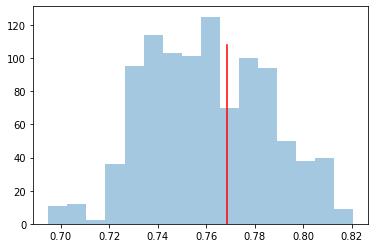

In [6]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)


summary = site_summary(post_samples, ['obs','prediction'])

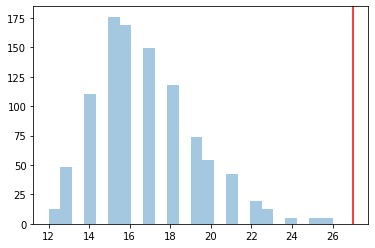

In [10]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                           stat=max)

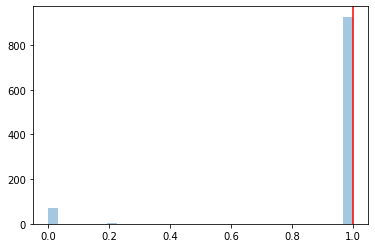

In [11]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)